<a href="https://colab.research.google.com/github/MMartinez0/IAyRN_AgoDic2024/blob/main/AF5_Simulaci%C3%B3n_de_un_sistema_a_partir_de_Euler_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

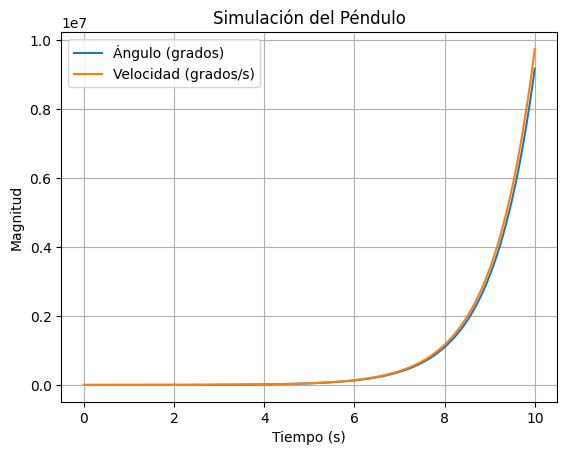

In [ ]:
import numpy as np

def cap5_pendulo(t, x):
    # Vector de estados
    q = x[0]  # Posición articular
    qp = x[1]  # Velocidad articular

    # Parámetros del péndulo
    m = 5  # Masa
    lc = 0.01  # Centro de masa
    g = 9.81  # Constante de aceleración gravitacional
    b = 0.14  # Viscosidad
    fc = 0.45  # Coeficiente de fricción
    Ir = 0.16  # Momento de inercia del rotor
    tau = 1.5 * np.sin(t)  # Par aplicado

    # Aceleración articular del péndulo
    qpp = (tau + b * qp + fc * np.tanh(100000 * qp) - m * g * lc * np.sin(q)) / Ir

    # Vector de salida
    xp = np.array([qp, qpp])  # xp[0]=x[1] velocidad articular, xp[1]=qpp aceleración articular

    return xp

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de simulación
ti = 0  # Tiempo inicial
tf = 10  # Tiempo final de simulación (segundos)
h = 0.0025  # Incremento de simulación

# Función del péndulo
def cap5_pendulo(t, x):
    q, qp = x  # Posición y velocidad articular
    m, lc, g, b, fc, Ir = 5, 0.01, 9.81, 0.17, 0.05, 0.16
    tau = 1.5 * np.sin(t)  # Par aplicado
    qpp = (tau + b * qp + fc * np.tanh(100000 * qp) - m * g * lc * np.sin(q)) / Ir
    return [qp, qpp]

# Simulación usando solve_ivp
ts = np.arange(ti, tf, h)
sol = solve_ivp(cap5_pendulo, [ti, tf], [0, 0], t_eval=ts, method='RK45')

# Obtención de coordenadas
x1 = 0.45 * np.sin(sol.y[0])
y1 = 0.45 * np.cos(sol.y[0])

# Gráfica de resultados
plt.plot(sol.t, (180 / np.pi) * sol.y[0], label="Ángulo (grados)")
plt.plot(sol.t, (180 / np.pi) * sol.y[1], label="Velocidad (grados/s)")
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Magnitud")
plt.title("Simulación del Péndulo")
plt.grid()
plt.show()
